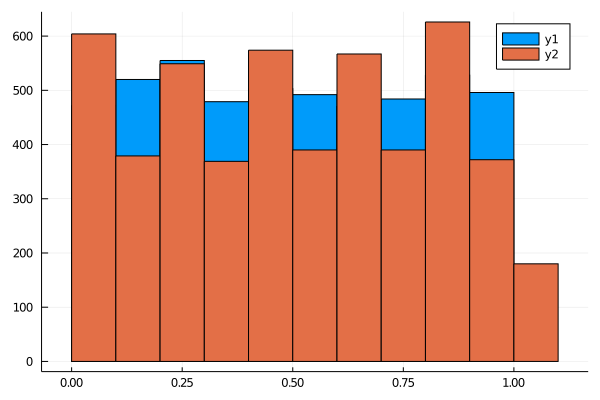

In [19]:
using Flux
using Plots
using Random
using Distributions

function process(input)
    Float32.(transpose(input))
end

nbatch = 5000

N = 25
mu = rand(nbatch) |> process #Unif[0,1]
nu = floor.(rand(nbatch) * (N+1)) / N |> process #Uniform{0,1/N,...,1}

# d1 = Normal(5,1)
# d2 = Normal(0,10)
# mu = rand(d1, nbatch) |> process
# nu = rand(d2, nbatch) |> process

data = collect(zip(mu, nu))
datanew = [([x],[y]) for (x,y) in data]

p = histogram(transpose(mu))
histogram!(p, transpose(nu))

In [20]:
f = Chain(Dense(1, 100, relu), Dense(100, 50, relu), Dense(50, 1, sigmoid)); #No clue what to make this neural network

In [21]:
using Flux:train!
using Statistics

function clip(x, threshold)
    if x < -threshold
        return -threshold
    elseif x > threshold
        return threshold
    else
        return x
    end
end

function clip_weights(model, threshold)
    for i in 1:length(Flux.params(model))
        if i % 2 == 1
            Flux.params(model)[i] .= clip.(Flux.params(model)[i], threshold)
        end
    end
end

function loss(model, mu, nu)
    mean(model(mu)) - mean(model(nu))
end

function pred_WassersteinDist(f, mu, nu)
    -loss(f, mu, nu)
end

alpha = 0.00005
opt = Flux.setup(RMSProp(alpha), f)
#opt = Flux.setup(Adam(), ClipValue(1e-2), f) 
#opt = Optimiser(ClipValue(1e-2), Adam(1e-3))

epochs = 1
c = 0.01
d = [pred_WassersteinDist(f, mu, nu)]

for i in 1:epochs
    Flux.train!(loss, f, datanew, opt)
    clip_weights(f, c)
    #println("iteration $i: ", Flux.params(f))
    push!(d, pred_WassersteinDist(f, mu, nu))
end

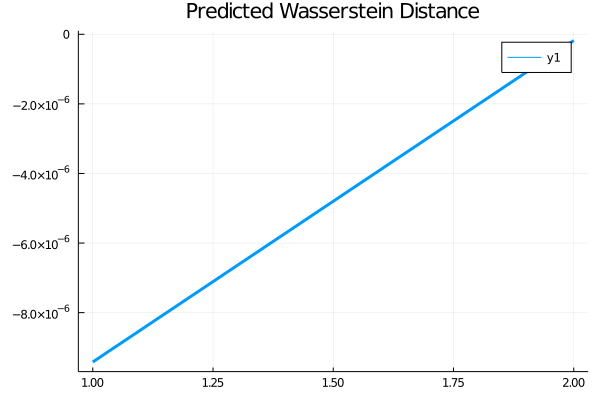

In [22]:
plot(d, title = "Predicted Wasserstein Distance", linewidth=3)

In [23]:
println(mu)

println(loss(f, mu, nu))

Float32[0.74975306 0.727643 0.8505521 0.48339927 0.5629631 0.4454082 0.64175045 0.4722907 0.2493465 0.31329754 0.3120975 0.6638405 0.42839456 0.8648664 0.429828 0.16789076 0.75046176 0.8088863 0.115925014 0.906853 0.49467677 0.503262 0.10807691 0.09317079 0.1334931 0.56743205 0.54726183 0.89902836 0.22641513 0.81487024 0.16697593 0.39360204 0.6471412 0.65084773 0.7664127 0.2964713 0.061825924 0.66298676 0.6321415 0.47072053 0.69403714 0.17053959 0.8764749 0.958219 0.76284736 0.42786455 0.9028362 0.9334534 0.62589204 0.3488955 0.5108325 0.028004477 0.57117885 0.9694952 0.3753853 0.6275805 0.05256906 0.42659384 0.38660726 0.7407026 0.14367747 0.8210746 0.70951414 0.7492086 0.20358925 0.23404436 0.38678893 0.9697255 0.09364702 0.99216926 0.64752084 0.8327455 0.21315521 0.872067 0.20381443 0.9252206 0.502804 0.8743454 0.85320985 0.59373283 0.50786483 0.8902353 0.6474218 0.68568665 0.7289633 0.6830006 0.7904696 0.008386737 0.88153887 0.14661299 0.5575796 0.61279887 0.43400976 0.19174422 0.3

0.993006 0.044384226 0.5522173 0.6851228 0.4840335 0.17863 0.486937 0.14741267 0.8065633 0.056598604 0.079703346 0.7471352 0.7290603 0.92927307 0.22615898 0.22851887 0.730492 0.022419997 0.042454667 0.1888764 0.12902896 0.0987182 0.81776994 0.88770056 0.08181557 0.5954049 0.18681931 0.50031453 0.3689224 0.46259993 0.33697549 0.20251323 0.5964346 0.08331321 0.20955248 0.9164325 0.5986518 0.37344515 0.84460294 0.80866545 0.15640359 0.2775283 0.9840929 0.7983947 0.3146575 0.9868402 0.18253271 0.39587474 0.50950116 0.2487161 0.7681344 0.10639784 0.06047321 0.76694936 0.5265764 0.7182607 0.7334617 0.6691054 0.6188842 0.93476486 0.054514673 0.4959763 0.715682 0.07903141 0.96475565 0.6067031 0.3893883 0.13509466 0.7574172 0.08878966 0.53344434 0.13351384 0.2523263 0.20781872 0.749419 0.8223849 0.553663 0.23536822 0.71921724 0.0020203167 0.9240803 0.34731266 0.04869468 0.51583374 0.922007 0.21962185 0.8978624 0.50471085 0.40410477 0.58916295 0.8759198 0.8921105 0.21028468 0.25343668 0.73413306

0.9726187 0.14655745 0.28607413 0.999347 0.21411479 0.81042653 0.94456404 0.42820618 0.12466353 0.76696974 0.6176948 0.9774909 0.3231129 0.012200545 0.20605257 0.18910234 0.44702274 0.15010408 0.4854464 0.4881729 0.76910836 0.98585635 0.66943383 0.25581595 0.049375918 0.5886223 0.29924458 0.7362507 0.46232483 0.54739994 0.8721336 0.3960773 0.47786984 0.11540927 0.7152467 0.4427087 0.41674745 0.82681006 0.16594368 0.7131222 0.40195167 0.22637947 0.16704373 0.71062887 0.15407899 0.9196849 0.12177313 0.14310321 0.25495362 0.78393453 0.23173688 0.93800616 0.4754683 0.7039891 0.879889 0.65622944 0.64102095 0.2169267 0.14223401 0.8346826 0.3696729 0.18540011 0.3877991 0.14212126 0.5753386 0.801777 0.9443482 0.42838424 0.4335253 0.44804296 0.628168 0.2200693 0.49080974 0.97060037 0.48058125 0.010513595 0.63199794 0.78974634 0.47753724 0.2032209 0.951551 0.270095 0.14253514 0.4604299 0.33493897 0.39042392 0.8059912 0.85947675 0.40341422 0.33348164 0.66032153 0.099310875 0.43431136 0.6522553 0.

0.8492283 0.30861455 0.35582075 0.21960549 0.5804529 0.14276741 0.113881685 0.4368773 0.12278783 0.83273077 0.9498566 0.9879877 0.065248825 0.49578196 0.021835327 0.64673585 0.67409617 0.97147924 0.28853863 0.99238825 0.68837166 0.9521378 0.70071834 0.6445902 0.5450456 0.28914198 0.9775499 0.78692657 0.9051848 0.29705635 0.88449335 0.8228174 0.42746082 0.46570635 0.14228183 0.6496161 0.12031655 0.63404197 0.7316826 0.75248075 0.99974954 0.04931833 0.8689905 0.28996035 0.5887683 0.5623306 0.16999422 0.43169317 0.6360716 0.46130264 0.72675604 0.46775916 0.58102876 0.18904139 0.38746125 0.13010149 0.89646035 0.53409046 0.37769037 0.36177063 0.34326887 0.50398576 0.6820219 0.86350626 0.6260573 0.3416942 0.08644532 0.9407326 0.37464657 0.9723871 0.54844296 0.30046803 0.3164106 0.7694751 0.21367262 0.64943 0.87632936 0.14618027 0.13138895 0.5485051 0.4222789 0.63716424 0.7199684 0.76988524 0.9016688 0.846999 0.06869298 0.20333827 0.94639516 0.8119514 0.23244305 0.90886754 0.3153722 0.6648723

0.7357966 0.6173344 0.72175246 0.7143962 0.13524488 0.7349853 0.40682745 0.6827902 0.50469565 0.5913284 0.98521197 0.8274068 0.95091206 0.7182219 0.4518886 0.45434862 0.049087085 0.99110246 0.71282923 0.31826118 0.02783293 0.62696373 0.030337641 0.86898696 0.8225679 0.5779217 0.9463193 0.36857623 0.008130286 0.7677519 0.5035131 0.67613417 0.24096861 0.12724279 0.47037786 0.63196415 0.1272037 0.5523972 0.043772586 0.17215915 0.6024221 0.8634533 0.5958501 0.9963455 0.12319908 0.30582714 0.7961577 0.9669823 0.61993086 0.40386292 0.78419304 0.55872715 0.60693544 0.6723367 0.53099585 0.06934341 0.7405844 0.36139405 0.15672578 0.57583964 0.5899669 0.56877565 0.48164654 0.7643956 0.44413546 0.6477691 0.6905734 0.43024275 0.053608578 0.94200003 0.14230195 0.06743622 0.9628766 0.36197266 0.5348081 0.51337427 0.8784923 0.9966407 0.8211518 0.30593407 0.37439427 0.73768574 0.06957725 0.0763467 0.45783728 0.6856391 0.24716893 0.20773934 0.13227992 0.80104494 0.3431283 0.36501652 0.573418 0.523389 0

0.7159144 0.2088847 0.50080425 0.11814085 0.47852966 0.1527795 0.74991083 0.16347831 0.46925244 0.97972053 0.0945186 0.35471457 0.034219246 0.9961599 0.9543524 0.41684082 0.12642466 0.16332221 0.3420192 0.47688472 0.93738145 0.17481694 0.7122863 0.4821478 0.7642915 0.95274824 0.22010934 0.23358732 0.64038557 0.8260264 0.77771646 0.8832249 0.4366564 0.9597591 0.09642993 0.98493063 0.64018965 0.46609804 0.855418 0.99132484 0.73281276 0.77488947 0.40255368 0.7639497 0.45594347 0.6635021 0.5543802 0.6107188 0.74514014 0.36308444 0.91106486 0.9479242 0.996035 0.55072045 0.58206373 0.40710947 0.36476165 0.39706224 0.5883154 0.39180368 0.2319235 0.16599971 0.22338441 0.20970115 0.52880836 0.29571822 0.04178847 0.87734085 0.7961449 0.43168074 0.8562174 0.9649911 0.4323714 0.5183592 0.7172956 0.4879377 0.28564095 0.85912037 0.7879479 0.67448825 0.046549857 0.8535616 0.7101191 0.11531745 0.740185 0.08042165 0.25846016 0.53178775 0.06346295 0.09481985 0.7041255 0.9853052 0.40339264 0.8522593 0.47

0.25554237 0.9292438 0.086360306 0.19522178 0.5482745 0.3154696 0.44161814 0.35674644 0.049180012 0.8999452 0.5367047 0.88625085 0.3566794 0.38080877 0.65087825 0.7534849 0.06610775 0.2829238 0.03477476 0.9549207 0.1847159 0.47967628 0.594934 0.8309689 0.0058717052 0.50393444 0.49419492 0.3302887 0.24513951 0.40487987 0.5094794 0.18896008 0.42194387 0.36118168 0.7759042 0.70306206 0.12545599 0.28705803 0.559643 0.6589353 0.49729142 0.45428714 0.86598444 0.7021739 0.3290045 0.8375179 0.38708916 0.043976355 0.60757583 0.23099962 0.95326185 0.8135837 0.033490974 0.25134835 0.13808946 0.4733343 0.2714989 0.07980161 0.27821952 0.5962332 0.8668771 0.10010523 0.74787515 0.21437064 0.8364767 0.6436887 0.16852377 0.45469862 0.23618874 0.966317 0.26645494 0.108097754 0.17149241 0.7175146 0.424678 0.10294163 0.2439752 0.4338625 0.5485246 0.26356688 0.7603159 0.84937614 0.76194924 0.30522352 0.154001 0.4221945 0.82879686 0.5092934 0.6970876 0.7892427 0.14176297 0.44807938 0.46332252 0.73614985 0.1

In [24]:
println("Wasserstein Distance: ", 1/N)

println("Predicted Distance: ", pred_WassersteinDist(f, mu, nu))

Wasserstein Distance: 0.04
Predicted Distance: -1.7881393e-7


In [25]:
function find_max_weight(model)
    max_weight = -1e6
    for i in 1:length(Flux.params(model))
        if i % 2 == 1
            max_weight = max(max_weight, maximum(Flux.params(model)[i]))
        end
    end
    max_weight
end

function find_max_abs_weight(model)
    max_weight = -1e6
    for i in 1:length(Flux.params(model))
        if i % 2 == 1
            max_weight = max(max_weight, maximum(abs.(Flux.params(model)[i])))
        end
    end
    max_weight
end

println(Flux.params(f))

println(find_max_weight(f))
println(find_max_abs_weight(f))

Params([Float32[-0.01; 0.01; -0.01; 0.01; 0.01; -0.01; -0.01; 0.01; 0.01; -0.01; -0.01; 0.01; 0.01; -0.01; -0.01; 0.01; -0.01; -0.01; -0.01; 0.01; 0.01; 0.01; 0.01; 0.01; 0.01; 0.01; -0.01; -0.01; 0.01; 0.01; -0.01; -0.01; -0.01; 0.01; -0.01; 0.01; 0.01; -0.01; -0.01; 0.01; 0.01; -0.01; -0.01; 0.01; 0.01; 0.01; 0.01; -0.01; 0.01; -0.01; 0.01; -0.01; -0.01; 0.01; 0.01; 0.01; -0.01; -0.01; 0.01; 0.01; -0.005922454; 0.01; -0.01; -0.01; -0.01; 0.01; 0.01; -0.01; -0.01; -0.01; 0.01; -0.01; 0.01; -0.01; 0.01; 0.01; 0.009271247; -0.01; -0.01; 0.01; 0.01; 0.01; -0.01; -0.01; -0.01; 0.01; -0.01; 0.01; -0.01; 0.0011512929; 0.01; -0.01; -0.01; -0.01; 0.01; -0.01; 0.01; 0.01; -0.01; -0.01;;], Float32[0.0, 0.00817914, 0.0, -0.0023745133, -0.013377671, 0.0, 0.0, 0.0006257048, -0.008431483, 0.0, 0.0, 0.0010436209, 0.004238902, 0.0, 0.0, -0.00030908824, 0.0, 0.0, 0.0, 0.0049458034, -0.011666794, -0.00021994316, 0.000697932, 0.0019169436, -0.006018346, 0.0012892048, 0.0, 0.0, -0.00040248717, -0.0104588

 0.01 -0.01 0.01 -0.01 -0.01 -0.01 -0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 0.01 -0.01; 0.01 0.01 -0.01 -0.01 0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 0.01 -0.01 -0.01 0.01 -0.006761813 0.006420231 0.01 -0.01 -0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 0.01 0.01 0.01 -0.01 -0.01 -0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 0.01 0.01 -0.01 -0.01 -0.01 0.01 -0.005967641 -0.01 0.01 0.01 -0.01 0.006354785 -0.01 -0.01 -0.0023082495 0.01 0.01 -0.01 0.01 -0.01 0.0037556887 0.01 -0.01 0.01 0.01 -0.01 -0.01 -0.0018994093 0.01 -0.01 -0.01 -0.01 0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 -0.01 -0.01 -0.01; 0.0011348486 0.01 0.01 0.01 -0.01 0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 0.01 0.01 0.01 -0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 0.01 0.01 0.01 -0.01 -0.01 0.01 0.01 -0.01 -0.01 -0.01 0.01 -0.01 0.01 0.01 0.01 0.01 0.01 0.01 -0.01 -0.01 -0.01 

 -0.01 0.01 -0.01 -0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 -0.01 0.01 -0.01 -0.01 -0.01 0.01 -0.01 -0.01 0.01 -0.01 -0.01 -0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 -0.004938242 0.01 0.01 -0.01; -0.01 -0.01 -0.01 -0.01 -0.01 0.01 -0.01 0.01 0.01 -0.01 0.01 -0.0055817594 -0.01 0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 -0.01 -0.01 -0.009259069 0.01 0.01 0.01 0.01 0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 0.01 -0.01 -0.01 0.01 0.0015997172 -0.01 0.01 0.01 0.01 0.01 0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 -0.01 -0.01 0.01 0.01 -0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 -0.01 0.01 -0.01 0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 0.0066388845 -0.01 0.01 0.01 -0.01 0.01 -0.008418458 0.01 -0.01 -0.01 -0.01 -0.01; -0.01 -0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 0.0038849711 0.01 0.01 -0.01 0.01 -0.01 0.01 -0.00943621 0.009469963 -0.01 -0.01 -0.01 0.01 -0.01 -0.0029632177 -0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 -0.01 -0.01 -

 -0.01 -0.01 -0.01 0.01; -0.01 0.01 -0.01 0.01 -0.01 -0.01 0.003332138 -0.01 0.0023705482 -0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 0.01 0.01 -0.01 -0.01 -0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.0033896512 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 0.01 -0.01 -0.01 -0.01 -0.01 -0.01 0.01 0.01 0.01 -0.01 -0.01 0.01 -0.01 -0.01 -0.01 -0.01 0.01 0.01 0.01 0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 -0.01 -0.01 0.0055079977 -0.01 0.01 -0.01 -0.01 0.01 -0.01 -0.01 -0.01 0.01 0.01 0.01 -0.01 0.004427028 -0.01 -0.01 0.01 0.01 0.01 0.01 -0.01 0.01 0.01 0.01 0.01 0.01; 0.01 -0.01 0.01 0.01 -0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 0.01 0.01 -0.01 -0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 0.01 0.007763287 -0.01 0.01 0.01 0.01 -0.01 0.01 -0.01 -0.0060915234 -0.0017349959 0.01 0.01 -0.01 0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 -0.01 0.01 0.01 0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 -0.01

 -0.01 -0.01 0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 -0.01 -0.01 -0.01 -0.0071710586 0.01 -0.01 0.003559375 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 0.01 0.01 -0.01 -0.01 -0.01 0.01 -0.01 -0.01 -0.01 0.01 -0.01 -0.01 -0.01 0.01 0.01 -0.01 0.0065617086 -0.01 -0.01 0.01 0.01 0.01 -0.01 -0.0019750358 -0.01 0.01 -0.01 -0.01 -0.01 -0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 0.007157755 0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 0.01 0.01 -0.01 -0.01 0.01 -0.01 0.01 0.01 -0.01 -0.01 -0.01 0.01 0.01 0.01; -0.01 0.01 0.01 0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 0.01 -0.01 0.01 0.01 0.01 0.00018128194 -0.01 0.01 -0.01 -0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 0.01 -0.01 -0.01 0.01 -0.01 -0.01 0.01 0.01 0.00052416744 0.01 0.01 0.01 -0.01 0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 0.01 0.01 0.01 -0.01 -0.01 0.01 0.01 -0.01 -0.01 0.01 0.01 -0.01 0.01 -0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 -0.01 -0.01 -0.01 